In [ ]:
H0:

HA: 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [5]:
#Creating artist_codes dataframe
artists = pd.read_csv('Data/spotify_artists_cleaned.csv')

In [11]:
artists.head()

,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,blues,children,classical,country,edm,...,indie,jazz,latin,pop,r&b,rap,reggae,rock,soul,soundtrack
0,4tN3rZ7cChj4Wns2Wt2Nj6,2 AM,"antiviralpop,kpop,minecraft",2075.0,41,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3LsQKoRgMc8VEkQn66jfAQ,2:54,metropopolis,10158.0,19,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,6bMul6rmRS03x38tWKYifO,883,"classicitalianpop,europop,italianarenapop,ital...",389768.0,59,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0Qh5UGy4Y1hrZlClkIP7oG,3-2,"deepgfunk,dirtytexasrap",62.0,19,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,51kPCmCJ7rXClxKDc2r4RA,July 7,trapsoul,3119.0,34,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [13]:
pop_artists = artists[(artists['pop']==True)]
rock_artists = artists[(artists['rock']==True)]
hiphop_artists = artists[(artists['hiphop']==True)]
country_artists = artists[(artists['country']==True)]

In [14]:
print(pop_artists.info())
print(rock_artists.info())
print(hiphop_artists.info())
print(country_artists.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25658 entries, 0 to 130957
Data columns (total 24 columns):
artist_id            25658 non-null object
artist_name          25658 non-null object
artist_genres        25658 non-null object
artist_followers     25658 non-null float64
artist_popularity    25658 non-null int64
blues                25658 non-null bool
children             25658 non-null bool
classical            25658 non-null bool
country              25658 non-null bool
edm                  25658 non-null bool
electronic           25658 non-null bool
folk                 25658 non-null bool
funk                 25658 non-null bool
hiphop               25658 non-null bool
indie                25658 non-null bool
jazz                 25658 non-null bool
latin                25658 non-null bool
pop                  25658 non-null bool
r&b                  25658 non-null bool
rap                  25658 non-null bool
reggae               25658 non-null bool
rock               

In [12]:
print(pop_artists.info())
pop_artists.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25658 entries, 0 to 130957
Data columns (total 24 columns):
artist_id            25658 non-null object
artist_name          25658 non-null object
artist_genres        25658 non-null object
artist_followers     25658 non-null float64
artist_popularity    25658 non-null int64
blues                25658 non-null bool
children             25658 non-null bool
classical            25658 non-null bool
country              25658 non-null bool
edm                  25658 non-null bool
electronic           25658 non-null bool
folk                 25658 non-null bool
funk                 25658 non-null bool
hiphop               25658 non-null bool
indie                25658 non-null bool
jazz                 25658 non-null bool
latin                25658 non-null bool
pop                  25658 non-null bool
r&b                  25658 non-null bool
rap                  25658 non-null bool
reggae               25658 non-null bool
rock               

,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,blues,children,classical,country,edm,...,indie,jazz,latin,pop,r&b,rap,reggae,rock,soul,soundtrack
0,4tN3rZ7cChj4Wns2Wt2Nj6,2 AM,"antiviralpop,kpop,minecraft",2075.0,41,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3LsQKoRgMc8VEkQn66jfAQ,2:54,metropopolis,10158.0,19,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,6bMul6rmRS03x38tWKYifO,883,"classicitalianpop,europop,italianarenapop,ital...",389768.0,59,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,6soPpJHlCtN6SY8pWlfbC6,-M-,"chanson,frenchindiepop,frenchrock",189142.0,60,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
10,1mmehjf7eHA10uHMisZGJg,!!!,"alternativedance,bigbeat,dancepunk,electronica...",100747.0,54,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False


In [59]:
pop_sample1 = np.array(pop_artists['artist_popularity'].sample(100))
rock_sample1 = np.array(rock_artists['artist_popularity'].sample(100))
hiphop_sample1 = np.array(hiphop_artists['artist_popularity'].sample(100))
country_sample1 = np.array(country_artists['artist_popularity'].sample(100))

In [60]:
sample_test_df = pd.DataFrame({'pop': pop_sample1, 'rock': rock_sample1, 'hiphop': hiphop_sample1, 'country': country_sample1})
sample_test_df.head()

,pop,rock,hiphop,country
0,30,59,40,44
1,58,67,40,7
2,69,0,46,32
3,35,45,41,56
4,45,49,0,70


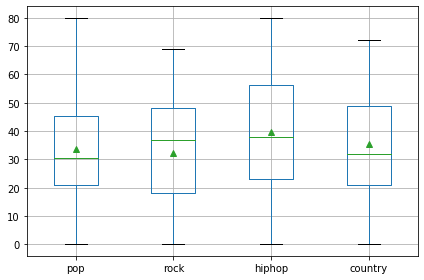

In [61]:
sample_test_df.boxplot(showmeans=True)
plt.tight_layout()

In [62]:
print('Means of the samples are: ', 
      pop_sample1.mean(), 
      rock_sample1.mean(),
      hiphop_sample1.mean(), '\n',
      country_sample1.mean()
     )

Means of the samples are:  33.51 32.42 39.75 
 35.38


In [75]:
print('STD of the samples are: ', 
      np.std(pop_sample1), 
      np.std(rock_sample1),
      np.std(hiphop_sample1), '\n',
      np.std(country_sample1)
     )

STD of the samples are:  18.925377142873536 18.391400164207184 20.83524657881447 
 18.541186585545166


In [70]:
## sample sizes for different groups
n1 = 100
n2 = 100
n3 = 100
n4 = 100

## number of groups
t = 4

In [69]:
## for the first group
y1_bar = pop_sample1.mean()
ss1 = pop_sample1.var(ddof = 1)

## for the second group
y2_bar = rock_sample1.mean()
ss2 = rock_sample1.var(ddof = 1)

## for the third group
y3_bar = hiphop_sample1.mean()
ss3 = hiphop_sample1.var(ddof = 1)

## for the last group
y4_bar = country_sample1.mean()
ss4 = country_sample1.var(ddof = 1)

In [71]:
## pooled variance
s_p = sum([ss1, ss2, ss3, ss4]) / (sum([n1, n2, n3, n4]) - 4)

In [72]:
y = np.sum([pop_sample1,rock_sample1,country_sample1,hiphop_sample1])

y_bar = y/(n1 + n2 + n3 + n4)

ns_means =(n1 + n2 + n3 + n4)*(np.sum([(y1_bar - y_bar)**2, 
                                       (y2_bar - y_bar)**2,
                                       (y3_bar - y_bar)**2, 
                                       (y4_bar - y_bar)**2 ])) / (t-1)

In [74]:
mod = ols('weight ~ group', data=sample_test_df)

PatsyError: Error evaluating factor: NameError: name 'group' is not defined
    weight ~ group
             ^^^^^